In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix

In [4]:
df = pd.read_csv('C:/Users/jacos/Downloads/car_ad.csv', header = 0)

In [5]:
df.head(n=20)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [6]:
df.shape

(9576, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         7943 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


Observando la salida anterior se hace necesario realizar las siguientes acciones:

* Imputar el atributo numérico engV de ser posible
* Reemplazar los valores NA por una categoría en el atributo engV, si es pertinente, en caso de no serlo sería necesario en este paso eliminar todas estas instancias con valores nulos.
* Crear las variables dummy para los valores categóricos.
* Igualmente no se aconseja trabajar con el atributo 'year' en modelos que no son series de tiempo, se puede trabajar con un atributo derivado 'age'que represente la diferencia del año de creación del conjunto de datos y la fecha de dicho atributo.

In [8]:
# Imputar valores
df['engV'].fillna(value = df['engV'].mean(), inplace = True)

In [9]:
# Se estima importante conocer el tipo de tracción por lo que se va
# a eliminar las instancia que no tienen valores en este atributo
df = df.dropna()

In [10]:
df['Age'] = 2020 - df.year

In [11]:
del df['year']

In [12]:
df.head()

,car,price,body,mileage,engV,engType,registration,model,drive,Age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,Kuga,full,10
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,E-Class,rear,9
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,CL 550,rear,12
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,B 180,front,8
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,X-Trail,full,7


In [13]:
df.shape

(7943, 10)

In [14]:
# Crear las variables dummy
dfdum = pd.get_dummies(df)

In [16]:
dfdum.head()

,price,mileage,engV,Age,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,...,model_ZDX,model_Zafira,model_i10,model_i20,model_i30,model_ix55 (Veracruz),drive_front,drive_fu,drive_full,drive_rear
0,15500.0,68,2.5,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20500.0,173,1.8,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,35000.0,135,5.5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17800.0,162,1.8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,16600.0,83,2.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
dfdum.to_csv('C:/Users/jacos/Downloads/car_ad_final.csv', header = True, index = False)

Si se desea trabajar precio como clase, se puede establecer, por ejemplo, que los que estén por debajo de la media se les asigna el valor de 1 y los que estén por encima el valor de 2.

In [18]:
dfclass = dfdum

In [19]:
dfclass.loc[dfclass['price'] < dfclass.price.mean(), 'price'] = 0 # dfclass.percentile([25])
dfclass.loc[dfclass['price'] >= dfclass.price.mean(), 'price'] = 1

In [20]:
dfclass.head()

,price,mileage,engV,Age,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,...,model_ZDX,model_Zafira,model_i10,model_i20,model_i30,model_ix55 (Veracruz),drive_front,drive_fu,drive_full,drive_rear
0,0.0,68,2.5,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,173,1.8,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,135,5.5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,162,1.8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0.0,83,2.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
dfclass.shape

(7943, 875)

In [22]:
# Guardar el dataframe para aprendizaje supervisado
dfclass.to_csv('C:/Users/jacos/Downloads/car_ad_final_clas.csv', header = True, index = False)

In [23]:
X = dfdum.loc[:, dfdum.columns != 'price']

In [24]:
y = dfdum['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =123)

In [26]:
mod_lin = LinearRegression()

In [27]:
mod_lin.fit(X, y)

LinearRegression()

In [28]:
y_test_pred = mod_lin.predict(X_test)

In [29]:
y_test_pred

array([ 0.29251575, -0.04590702,  0.70525265, ...,  0.02775192,
        0.5684166 ,  0.77458763])

In [30]:
y_train_pred = mod_lin.predict(X_train)

In [31]:
y_train_pred

array([ 1.11101913, -0.10818291, -0.0026083 , ...,  0.07356548,
        0.16804218,  0.70425224])

In [32]:
mod_lin.intercept_

-7087803876.921761

In [33]:
mod_lin.coef_

array([-4.99934865e-04, -5.68387560e-04, -2.52312112e-02, -1.80466290e+08,
        1.08769623e+08, -4.51811560e+07,  1.99957751e+07,  4.85739597e+07,
        1.08769623e+08,  1.18713747e+08,  7.60107326e+07,  1.12790455e+08,
        1.31770332e+08,  3.68715050e+07,  1.14850750e+08,  1.06083698e+08,
        7.05125372e+07,  9.28126547e+07,  1.08769623e+08,  1.07987090e+08,
        7.42834054e+07,  7.47591795e+07,  5.50942332e+07,  9.98678605e+07,
        1.68887861e+08,  9.04210327e+07,  8.04579508e+07,  1.08769624e+08,
        5.41148435e+07,  8.86483128e+07,  1.15488695e+08,  1.07987090e+08,
        5.60686590e+07,  1.08002908e+08,  9.15406450e+07,  9.02711555e+07,
        1.33416632e+08,  1.00070973e+08, -4.03734234e+07,  4.85739586e+07,
        6.53084670e+07,  9.98835833e+07,  1.03189397e+08, -1.26673983e+07,
        1.04317612e+08,  1.08769623e+08,  1.11370069e+08,  1.08769622e+08,
        1.00321706e+08,  1.08769622e+08,  8.49954357e+07,  2.96641703e+06,
        1.08769623e+08,  

In [34]:
r2_score(y_train, y_train_pred)

0.6506306608503134

In [35]:
r2_score(y_test, y_test_pred)

0.666411684939676

In [36]:
mod_log = LogisticRegression(max_iter = 2000)

In [37]:
X_l = dfclass.loc[:, dfclass.columns != 'price']

In [38]:
y_l = dfclass['price']
y_l

0       0.0
1       1.0
2       1.0
3       1.0
5       0.0
       ... 
9571    0.0
9572    0.0
9573    1.0
9574    1.0
9575    1.0
Name: price, Length: 7943, dtype: float64

In [42]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_l, y_l, test_size = 0.2, random_state =123)

In [53]:
mod_log.fit(X_trainl, y_trainl)

LogisticRegression(max_iter=2000)

In [63]:
mod_log.intercept_

array([1.36350021])

In [64]:
mod_log.coef_

array([[ 4.90333894e-04, -3.40610860e-04, -4.33135275e-01,
         2.53344023e-01,  4.29401623e-01, -4.96162829e-04,
         8.59029324e-01,  2.16061611e+00,  1.49238159e+00,
        -5.65781630e-01,  9.45053922e-01, -2.92313763e-01,
        -3.29233680e-05,  9.18303882e-01, -1.32010746e+00,
        -7.50077027e-01,  2.63380963e-01, -6.39037575e-02,
        -2.28683027e-01, -1.61020623e-01, -1.65119839e+00,
        -2.38820163e-01,  1.21845802e-02, -2.11049683e-01,
         2.30975250e-01, -1.08459384e+00, -6.44789427e-01,
        -3.77081752e-01,  1.91221437e-01, -1.83570334e+00,
        -7.15333854e-01, -2.16061098e-01,  0.00000000e+00,
         4.21006356e-01, -1.83290051e-01,  1.19838654e+00,
        -4.36898509e-01,  1.55053824e+00,  0.00000000e+00,
        -3.52805612e-01,  9.00754038e-01,  5.54436138e-01,
        -4.58702886e-01,  4.91963932e-01, -1.93469403e-04,
         1.09740377e+00,  1.89596415e+00, -3.05692699e-02,
         9.25827531e-01, -6.96146831e-01,  1.20274269e+0

In [54]:
y_train_predl = mod_log.predict(X_trainl)

In [55]:
y_test_predl = mod_log.predict(X_testl)
y_test_predl

array([0., 0., 1., ..., 0., 1., 1.])

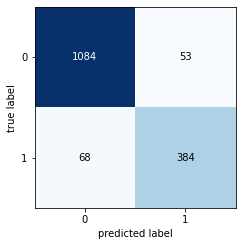

In [56]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_testl,y_test_predl), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10)

In [57]:
accuracy_score(y_testl, y_test_predl)

0.9238514789175583

In [58]:
precision_score(y_testl, y_test_predl)

0.8787185354691075

In [59]:
recall_score(y_testl, y_test_predl)

0.8495575221238938

In [60]:
roc_auc_score(y_testl, y_test_predl)

0.9014718129528879

In [61]:
yl = mod_log.decision_function(X_testl)
yl

array([-1.09695195, -5.68096157,  1.33278065, ..., -6.60446276,
        0.14945336,  1.6357033 ])

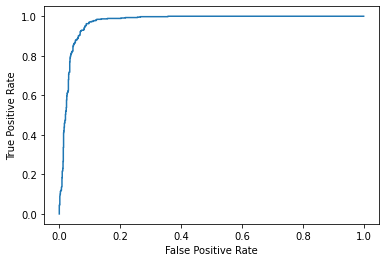

In [62]:
fpr, tpr, _ = roc_curve(y_testl, yl, pos_label = mod_log.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()